<a href="https://colab.research.google.com/github/buskingsue/Machine_Learning/blob/main/ML03_decision_tree_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
'''
import numpy as np

numpy는 파이썬에서 과학 계산을 위한 라이브러리입니다.
np는 numpy를 간략하게 사용할 수 있도록 하는 별칭입니다.
주로 수학적 연산, 배열 처리 등을 할 때 사용됩니다.

import pandas as pd

pandas는 데이터 분석을 위한 라이브러리로,
데이터프레임(DataFrame) 구조를 제공하며 데이터 처리 및 분석에 유용합니다.
pd는 pandas를 간략하게 사용할 수 있도록 하는 별칭입니다.

from sklearn.datasets import load_iris

sklearn.datasets는 데이터셋을 불러오는 기능을 제공하는 scikit-learn 라이브러리의
서브모듈입니다. load_iris는 유명한 "아이리스(Iris)" 데이터셋을 불러오는 함수입니다.
이 데이터셋은 꽃의 종류를 분류하는 데 사용됩니다.

from sklearn.model_selection import train_test_split

train_test_split는 데이터를 훈련 세트와 테스트 세트로 분할하는 함수입니다.
 머신러닝 모델을 훈련시키고 평가하기 위해 데이터를 나누는 데 사용됩니다.

from sklearn.preprocessing import StandardScaler

StandardScaler는 데이터의 특성값을 표준화(standardization)하는 데 사용되는 클래스입니다.
표준화는 각 특성값을 평균이 0이고 분산이 1인 값으로 변환하는 방법입니다.
 이 과정은 모델의 성능을 높이는 데 도움이 됩니다.

import matplotlib.pyplot as plt

matplotlib.pyplot은 데이터 시각화를 위한 라이브러리입니다.
 plt는 matplotlib.pyplot을 간략하게 사용할 수 있도록 하는 별칭입니다.
  이 라이브러리를 사용하여 그래프나 차트를 그릴 수 있습니다.
이 코드는 주로 머신러닝을 위한 데이터 준비, 모델 학습 및 평가,
그리고 시각화를 위한 기본적인 라이브러리들을 불러오는 코드입니다.
'''

'\nimport numpy as np\n\nnumpy는 파이썬에서 과학 계산을 위한 라이브러리입니다. \nnp는 numpy를 간략하게 사용할 수 있도록 하는 별칭입니다.\n주로 수학적 연산, 배열 처리 등을 할 때 사용됩니다.\n\nimport pandas as pd\n\npandas는 데이터 분석을 위한 라이브러리로, \n데이터프레임(DataFrame) 구조를 제공하며 데이터 처리 및 분석에 유용합니다.\npd는 pandas를 간략하게 사용할 수 있도록 하는 별칭입니다.\n\nfrom sklearn.datasets import load_iris\n\nsklearn.datasets는 데이터셋을 불러오는 기능을 제공하는 scikit-learn 라이브러리의\n서브모듈입니다. load_iris는 유명한 "아이리스(Iris)" 데이터셋을 불러오는 함수입니다. \n이 데이터셋은 꽃의 종류를 분류하는 데 사용됩니다.\n\nfrom sklearn.model_selection import train_test_split\n\ntrain_test_split는 데이터를 훈련 세트와 테스트 세트로 분할하는 함수입니다.\n 머신러닝 모델을 훈련시키고 평가하기 위해 데이터를 나누는 데 사용됩니다.\n\nfrom sklearn.preprocessing import StandardScaler\n\nStandardScaler는 데이터의 특성값을 표준화(standardization)하는 데 사용되는 클래스입니다. \n표준화는 각 특성값을 평균이 0이고 분산이 1인 값으로 변환하는 방법입니다.\n 이 과정은 모델의 성능을 높이는 데 도움이 됩니다.\n\nimport matplotlib.pyplot as plt\n\nmatplotlib.pyplot은 데이터 시각화를 위한 라이브러리입니다.\n plt는 matplotlib.pyplot을 간략하게 사용할 수 있도록 하는 별칭입니다.\n  이 라이브러리를 사용하여 그래프나 차트를 그릴 수 있습니다.\n이 코드는 주로 머신러닝을 위한 데이터 준비, 모

In [3]:
iris_dataset = load_iris()
'''
load_iris() 함수를 호출하여 Iris 데이터셋을 불러옵니다.
iris_dataset 변수에는 Iris 데이터셋이 Bunch 객체(딕셔너리와 유사한 데이터 구조) 형태로 저장됩니다.
이 데이터셋에는 data(특성값), target(레이블), feature_names(특성 이름),
target_names(레이블 이름) 등의 정보가 포함됩니다.
'''
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
'''
iris_dataset.data → Iris 데이터셋의 특성(꽃잎 길이, 꽃잎 너비 등) 값을 가져옵니다.
iris_dataset.feature_names → 각 특성의 이름을 가져옵니다.
pd.DataFrame(..., columns=...)을 사용하여 pandas 데이터프레임(iris)을 생성합니다.
이제 iris는 150개의 샘플과 4개의 특성(열)을 가진 데이터프레임이 됩니다.
'''
labels = iris_dataset.target_names
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
target = iris_dataset.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris, target, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
iris_tree = DecisionTreeClassifier(criterion='entropy')
iris_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
iris_tree.score(x_train, y_train)

1.0

In [ ]:
iris_tree.score(x_test, y_test)

0.9666666666666667

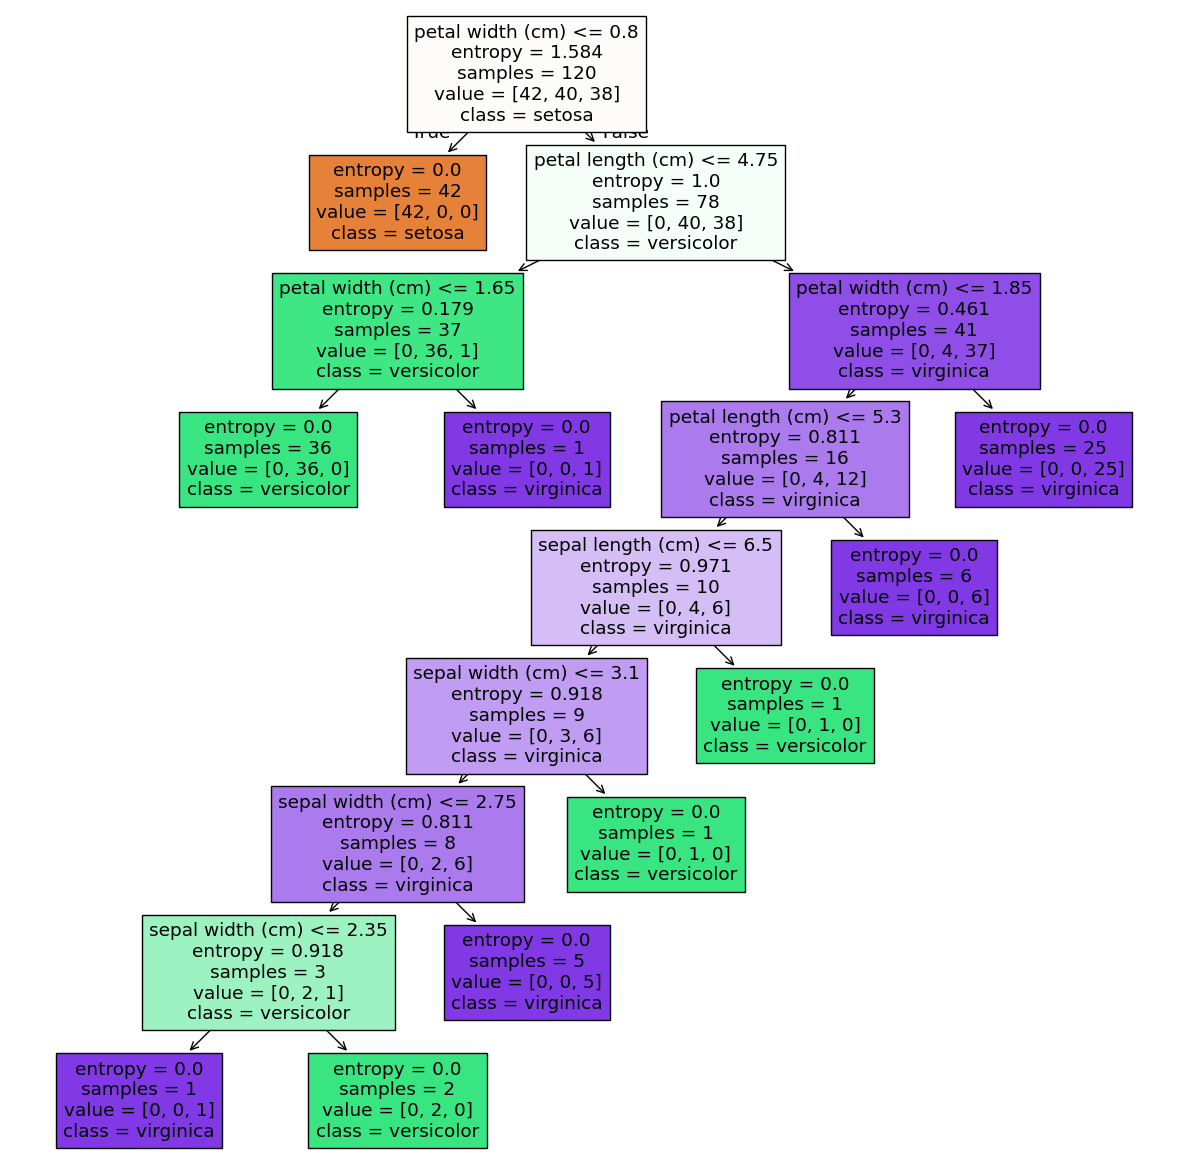

In [ ]:
#의사결정나무(Decision Tree) 모델을 생성하고 시각화하는 기능을 제공합니다.
from sklearn import tree
plt.figure(figsize=(15, 15))
tree.plot_tree(iris_tree, feature_names=iris.columns, class_names=labels, filled=True)
plt.show()